In [154]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [155]:
data=pd.read_csv("C:/Users/trinity/Downloads/arpithaphd/arpithaphd/bigdatamart_Train.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [156]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [157]:
data.shape

(8523, 12)

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## Handling Missing values

In [159]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [160]:
data["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [161]:
data["Outlet_Size"]=data["Outlet_Size"].replace({"Medium":'1',"Small":"2", "High":"3"})

In [162]:
data["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT046    930
OUT049    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [163]:
data["Outlet_Identifier"]= data["Outlet_Identifier"].replace({"OUT027":"027","OUT013":"013","OUT035":"035","OUT049":"049",
                                                              "OUT046":"046","OUT045":"045","OUT018":"018","OUT017":"017",
                                                              "OUT010":"010","OUT019":"019"})
                                                              

In [164]:
data["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [165]:
data["Outlet_Location_Type"]=data["Outlet_Location_Type"].replace({"Tier 3":"3","Tier 2":"2","Tier 1":"1"})

In [166]:
data["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [167]:
data["Outlet_Type"]=data["Outlet_Type"].replace({"Supermarket Type1":"1","Grocery Store":"2","Supermarket Type3":"3","Supermarket Type2":"4"})

In [168]:
data["Outlet_Type"].value_counts()

1    5577
2    1083
3     935
4     928
Name: Outlet_Type, dtype: int64

In [169]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,049,1999,1,1,1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,018,2009,1,3,4,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,049,1999,1,1,1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,010,1998,NaN,3,2,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,013,1987,3,3,1,994.7052


In [170]:
data1= data[["Outlet_Size","Outlet_Identifier","Outlet_Establishment_Year","Outlet_Location_Type"]]
known_size= data1[data1["Outlet_Size"].notnull()].values
unknown_size=data1[data1["Outlet_Size"].isnull()].values
y=known_size[:,0]
X=known_size[:,1:]


In [171]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(random_state=0, n_estimators=100, n_jobs=-1)
rfr.fit(X,y)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [172]:
predictages=rfr.predict(unknown_size[:,1::])
data.loc[(data.Outlet_Size.isnull()),'Outlet_Size'] = predictages

In [173]:
data["Outlet_Size"].isnull().sum()

0

In [174]:
data=data.drop("Item_Weight",axis=1)

In [175]:
data.isnull().sum()

Item_Identifier              0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

The missing values in Outlet_Size is processed.
The colum Item_Weight can be dropped as it is not correlated to Item_Outlet_Sales

In [179]:
cate=data.select_dtypes(include=["object"]).columns
le= LabelEncoder()
data[cate] = data[cate].apply(lambda col: le.fit_transform(col))

# Outlier 

<AxesSubplot:xlabel='Item_MRP'>

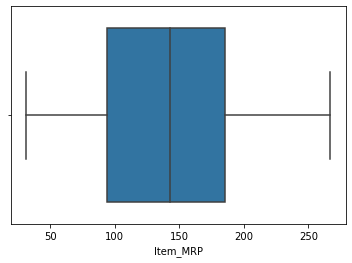

In [181]:
sns.boxplot("Item_MRP",data=data)

There are no Outliers

# Data Distribution

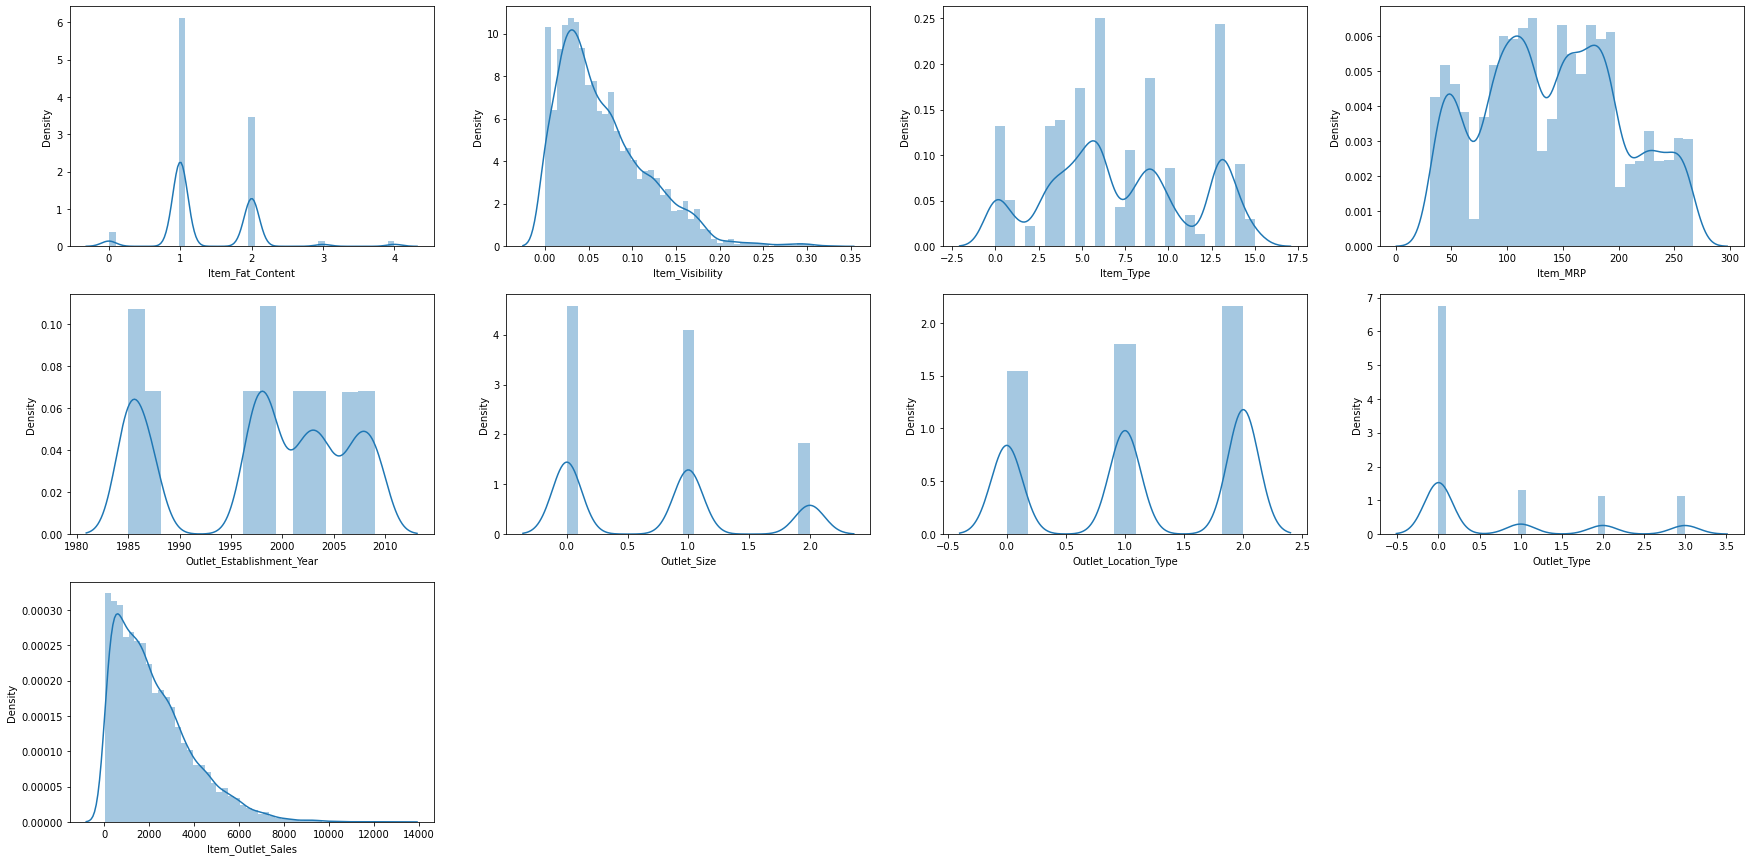

In [182]:
plt.figure(figsize=(30,15))
for i,col in enumerate(data[:], start=1):
    plt.subplot(3,4,i)
    sns.distplot(data[col])
plt.show()

In [183]:
data["Item_Visibility"]=np.log(1+data["Item_Visibility"])
data["Item_MRP"]=np.log(1+data["Item_MRP"])
data["Item_Type"]=np.log(1+data["Item_Type"])
data["Item_Outlet_Sales"]=np.log(1+data["Item_Outlet_Sales"])
            


We handled the skewed data using log function

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='count'>

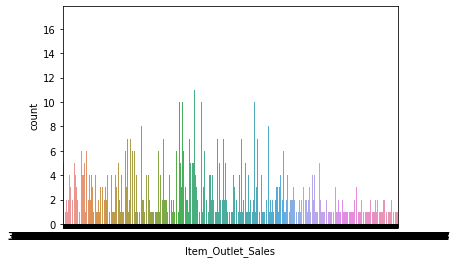

In [184]:
sns.countplot(data["Item_Outlet_Sales"])

# Correlation

<AxesSubplot:>

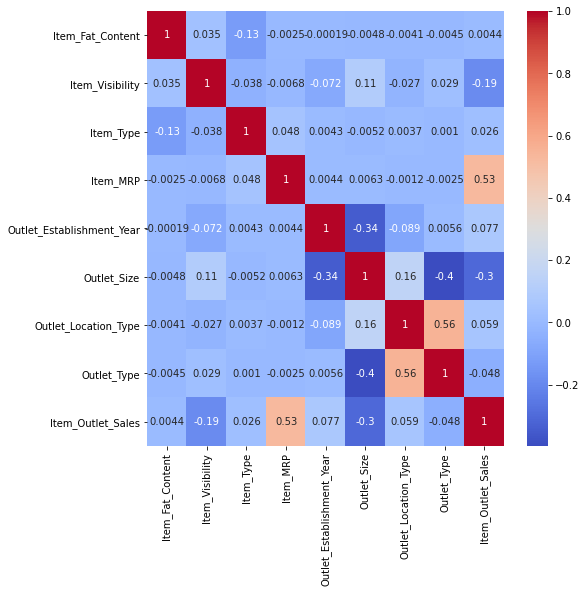

In [186]:
corr=data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")

# data Modeling

In [189]:
X=data.drop("Item_Outlet_Sales",axis=1)
y=data["Item_Outlet_Sales"]

In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [191]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train_scale = sc_X.fit_transform(X_train)
X_test_scale = sc_X.transform(X_test)


In [192]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor() 
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [193]:
regressor.score(X_train,y_train)

1.0

In [194]:
regressor.score(X_test,y_test)

0.48083979008142064

In [195]:
print("Test Accuracy" ,regressor.score(X_test,y_test))
print("Train Accuracy",regressor.score(X_train,y_train))

Test Accuracy 0.48083979008142064
Train Accuracy 1.0


In [196]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [197]:
y_pred = regressor.predict(X_test)

In [198]:
print("Test Accuracy" ,regressor.score(X_test,y_test))
print("Train Accuracy",regressor.score(X_train,y_train))

Test Accuracy 0.5414216794462682
Train Accuracy 0.5286243643693049


In [199]:
from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0) 
regressor.fit(X, y) 

RandomForestRegressor(random_state=0)

In [200]:
y_pred = regressor.predict(X_test) 
print("Test Accuracy" ,regressor.score(X_test,y_test))
print("Train Accuracy",regressor.score(X_train,y_train))

Test Accuracy 0.9616075070135157
Train Accuracy 0.958530431573309
